In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

import warnings
warnings.filterwarnings("ignore")

In [2]:
con = sqlite3.connect(r"C:\Users\utkun\OneDrive\Desktop\Data Analysis Udemy\password_data.sqlite")

In [3]:
data = pd.read_sql_query("SELECT * FROM Users",con)

In [4]:
data.shape

(100000, 3)

In [5]:
data.head(3)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1


In [6]:
data.isnull().sum()

index       0
password    0
strength    0
dtype: int64

In [7]:
data.isna().sum()

index       0
password    0
strength    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [11]:
data['strength'].value_counts()

strength
1    73883
0    13622
2    12495
Name: count, dtype: int64

In [12]:
data.drop(['index'],axis = 1,inplace=True)

### Semantic Analysis

In [134]:
flt1 = data['password'].str.isnumeric()

In [135]:
data['password'].str.isnumeric().sum()

26

In [136]:
data[filter1]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [137]:
data['password'].str.isalnum().sum()

97203

In [138]:
flt2 = data['password'].str.isalnum()

In [139]:
data['password'].str.isalpha().sum()

50

In [140]:
flt3 = data['password'].str.isalpha()

In [141]:
pwd_category = ['alpha' , 'numeric' , 'alphanumeric']

In [142]:
category_count = [data['password'].str.isalpha().sum() , data['password'].str.isnumeric().sum() , data['password'].str.isalnum().sum()]

In [143]:
df = pd.DataFrame(list(zip(pwd_category, category_count)), columns=['Category', 'Count'])


In [144]:
df

,Category,Count
0,alpha,50
1,numeric,26
2,alphanumeric,97203


In [145]:
df['Count'].sum()

97279

In [146]:
100000-97279

2721

In [152]:
data[-(flt1+flt2+flt3)]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [149]:
100000- 97203

2797

In [156]:
data['password'].str.istitle().sum()

932

In [157]:
import string

In [159]:
punc = string.punctuation

In [165]:
def find_semantics(row):
    for char in row:
        if char in punc:
            return 1
        else:
            pass

In [168]:
data[data['password'].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


### Feature Engineering

In [220]:
data.head(3)

,password,strength,length,lower_freq,upper_freq
0,zxe870819,1,9,0.333333,0.0
1,xw46454nr23l,1,12,0.416667,0.0
2,soporte13,1,9,0.777778,0.0


In [221]:
len(data['password'][0])

9

In [222]:
data['length'] = data['password'].str.len()

In [223]:
data.head(9)

,password,strength,length,lower_freq,upper_freq
0,zxe870819,1,9,0.333333,0.0
1,xw46454nr23l,1,12,0.416667,0.0
2,soporte13,1,9,0.777778,0.0
3,accounts6000webhost.com,2,23,0.782609,0.0
4,c443balg,1,8,0.625000,0.0
5,16623670p,1,9,0.111111,0.0
6,yj9q3f8p,1,8,0.625000,0.0
7,180ZIRUVIcuFERy,2,15,0.200000,0.6
8,djredd09,1,8,0.750000,0.0


In [232]:
def ft_eng(p):
    l = sum(1 for ch in p if ch.islower())
    u = sum(1 for ch in p if ch.isupper())
    n = sum(1 for ch in p if ch.isdigit())
    s=0
    for ch in p:
        if not ch.isalpha() and not ch.isdigit():
            s=s+1
    return l, u, n, s

In [233]:
data[['lower_freq', 'upper_freq', 'digit_freq', 'spcl_char_freq']] = data['password'].apply(lambda p: pd.Series(ft_eng(p)))

In [236]:
data['lower_freq'] = np.round(data['lower_freq'] / data['length'],3)
data['upper_freq'] = np.round(data['upper_freq'] / data['length'],3)
data['digit_freq'] = np.round(data['digit_freq'] / data['length'],3)
data['spcl_char_freq'] = np.round(data['spcl_char_freq'] / data['length'],3)

In [238]:
data.head()

,password,strength,length,lower_freq,upper_freq,digit_freq,spcl_char_freq
0,zxe870819,1,9,0.037,0.0,0.074,0.000
1,xw46454nr23l,1,12,0.035,0.0,0.049,0.000
2,soporte13,1,9,0.086,0.0,0.025,0.000
3,accounts6000webhost.com,2,23,0.034,0.0,0.008,0.002
4,c443balg,1,8,0.078,0.0,0.047,0.000


In [239]:
data[['length' , 'strength']].groupby(['strength']).agg(['min','max','mean','median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [242]:
cols = ['length','lower_freq','upper_freq','digit_freq','spcl_char_freq']

for col in cols:
    print(col)
    print(data[[col,'strength']].groupby(['strength']).agg(['min','max','mean','median']))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lower_freq
         lower_freq                        
                min    max      mean median
strength                                   
0               0.0  0.333  0.107861  0.111
1               0.0  0.109  0.066553  0.070
2               0.0  0.061  0.026761  0.026


upper_freq
         upper_freq                        
                min    max      mean median
strength                                   
0               0.0  0.200  0.002023  0.000
1               0.0  0.109  0.000831  0.000
2               0.0  0.058  0.023163  0.027


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.043115  0.041
1               

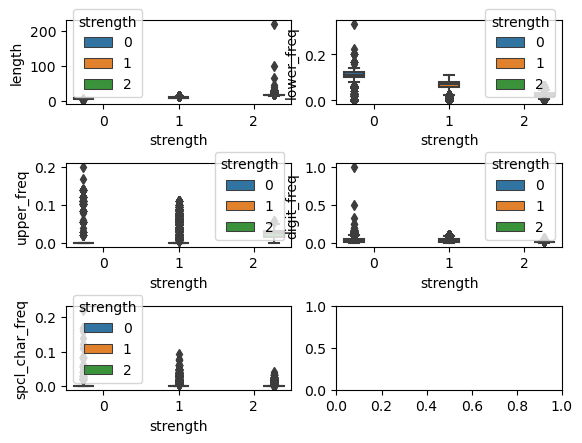

In [248]:
fig , ((ax1 ,ax2) , (ax3,ax4) , (ax5,ax6)) = plt.subplots(3,2)

sns.boxplot(x='strength' , y='length' , hue='strength' , ax=ax1 , data=data)
sns.boxplot(x='strength' , y='lower_freq' , hue='strength' , ax=ax2 , data=data)
sns.boxplot(x='strength' , y='upper_freq' , hue='strength' , ax=ax3 , data=data)
sns.boxplot(x='strength' , y='digit_freq' , hue='strength' , ax=ax4 , data=data)
sns.boxplot(x='strength' , y='spcl_char_freq' , hue='strength' , ax=ax5 , data=data)

plt.subplots_adjust(hspace=0.7)

### Univariate Analysis to determine Feature Importance

In [257]:
def get_dist(data,feature):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.violinplot(x='strength' , y=feature , data=data)
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature],color='red',label='0',hist=False)
    sns.distplot(data[data['strength']==1][feature],color='blue',label='1',hist=False)
    sns.distplot(data[data['strength']==2][feature],color='orange',label='2',hist=False)
    plt.legend()
    plt.show()

#### Lesser the overlapping in distplot better is the feature

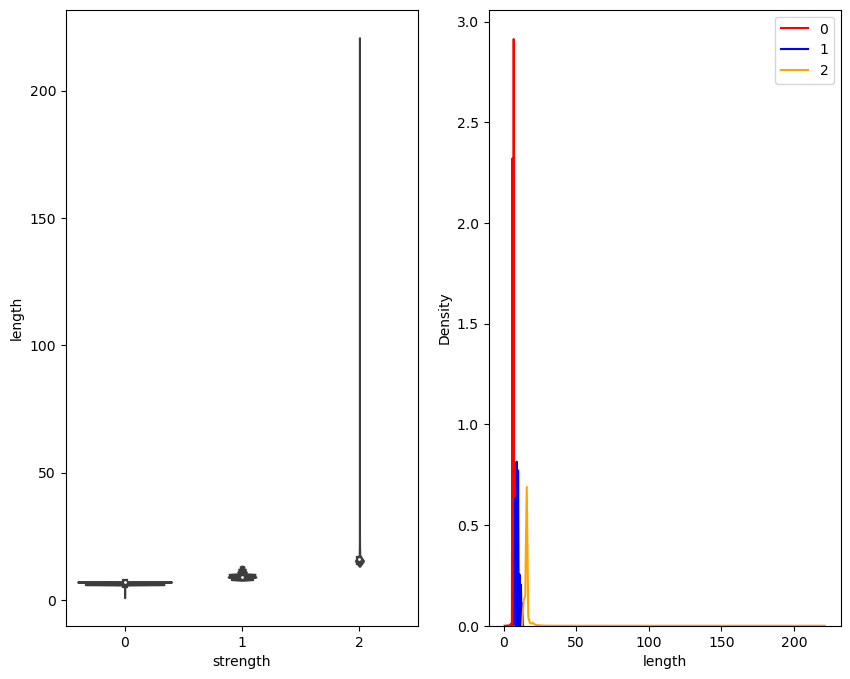

In [258]:
get_dist(data , "length")

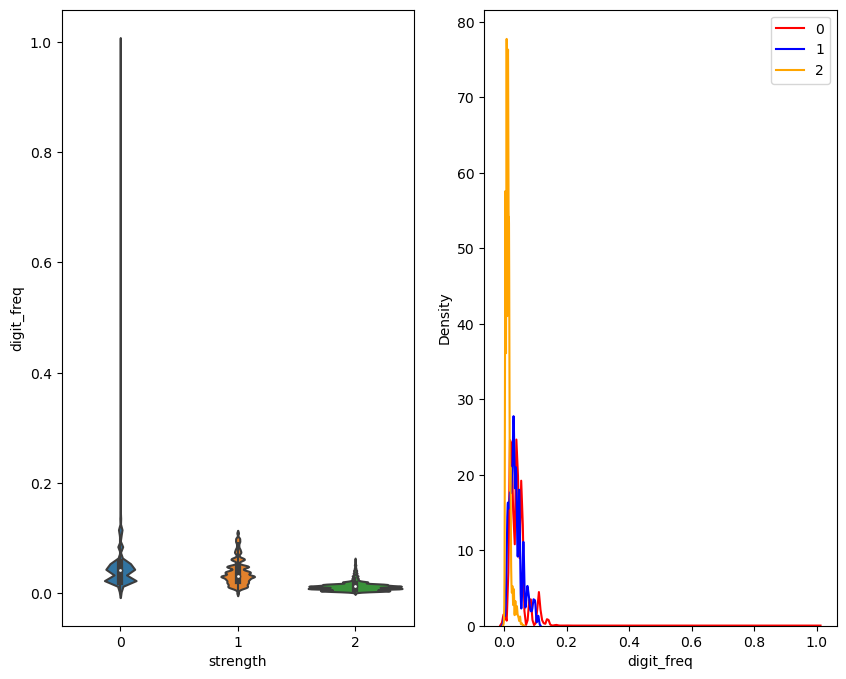

In [259]:
get_dist(data , "digit_freq")

### Applying TF - IDF
TF :- Term Frequency
IDF :- Inverse Document Frequency

Text to Vector Representation

In [260]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [261]:
vectorizer = TfidfVectorizer(analyzer='char')

In [263]:
dataframe = data.sample(frac=1)

In [264]:
x= list(dataframe['password'])

In [265]:
X = vectorizer.fit_transform(x)

In [266]:
X.shape

(100000, 99)

In [267]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [269]:
len(vectorizer.get_feature_names_out())

99

In [270]:
df2 = pd.DataFrame(X.toarray() , columns = vectorizer.get_feature_names_out())

In [271]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Applying ML algo on data

In [272]:
df2['length'] = dataframe['length']
df2['lower_freq'] = dataframe['lower_freq']

In [273]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lower_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.037
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.035
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.086
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.034
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.070
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.080
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.086
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.074


In [275]:
y=dataframe['strength']

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [276]:
X_train , X_test , y_train, y_test = train_test_split(df2,y,test_size=0.2)

In [279]:
clf = LogisticRegression(multi_class='multinomial')

In [280]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [281]:
y_pred = clf.predict(X_test)

In [282]:
y_pred

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

In [283]:
password = "@#123abc"

In [284]:
sample_arr = np.array([password])

In [294]:
samp_matrix = vectorizer.transform(sample_arr)

In [295]:
samp_matrix.toarray().shape

(1, 99)

In [296]:
len(password)

8

In [297]:
len([char for char in password if char.islower()])/len(password)

0.375

In [305]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [314]:
def predict():
    password = input("Enter a password :")
    sample_arr = np.array([password])
    samp_matrix = vectorizer.transform(sample_arr)
    len_pass  = len(password)
    lower_case = len([char for char in password if char.islower()])/len(password)
    new_matrix2 = np.append(samp_matrix.toarray(),(len_pass,lower_case)).reshape(1,101)
    rst = clf.predict(new_matrix2)
    
    if rst == 0:
        return"Passwrd is Weak"
    elif rst == 1:
        return"Passwrd is Medium"
    if rst == 2:
        return"Passwrd is Strong"
    

In [315]:
predict()

Enter a password :@!2345abc


'Passwrd is Strong'

In [318]:
accuracy_score(y_test,y_pred)

0.80675

In [319]:
confusion_matrix(y_test,y_pred)

array([[  810,  1911,     0],
       [  634, 13705,   395],
       [   69,   856,  1620]], dtype=int64)

In [321]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.30      0.38      2721
           1       0.83      0.93      0.88     14734
           2       0.80      0.64      0.71      2545

    accuracy                           0.81     20000
   macro avg       0.72      0.62      0.66     20000
weighted avg       0.79      0.81      0.79     20000

